# Analisis de una sola acción - Versión estudiantes

## Instalar paquetes

In [ ]:

 #Instalar paquetes necesarios
!pip install yfinance
!pip install fix_yahoo_finance

# Importar paquete y nombrarlos de manera breve para facilitar su uso
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Restringir la aparición de warnings
import warnings
warnings.filterwarnings("ignore")

#Importar paquetes para descargar acciones
import fix_yahoo_finance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Descargar datos

In [ ]:
import yfinance as yf
# Seleccionar fecha de inicio y final
start_date = '2003-01-01'
end_date = '2023-01-01'
# Seleccionar acción. (utilizar ticker ampliamente utilizados)
ticker = 'JPM'
# Descargar la informaciónn. La funcion de python está en el paquete "yf" y sus argumentos son ticker, fecha inicial y fecha final.
data = yf.download(ticker, start_date, end_date)
# Mostrar ultimas 5 observaciones (filas)
print(data.tail())

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-12-23  130.580002  131.440002  129.639999  131.279999  130.317398   
2022-12-27  131.570007  132.220001  130.550003  131.740005  130.774033   
2022-12-28  131.850006  133.410004  131.009995  132.460007  131.488754   
2022-12-29  132.929993  133.270004  132.309998  133.220001  132.243179   
2022-12-30  132.809998  134.330002  132.440002  134.100006  133.116730   

             Volume  
Date                 
2022-12-23  5091900  
2022-12-27  5411000  
2022-12-28  8827700  
2022-12-29  6585200  
2022-12-30  9290300  


## Grafica del precio

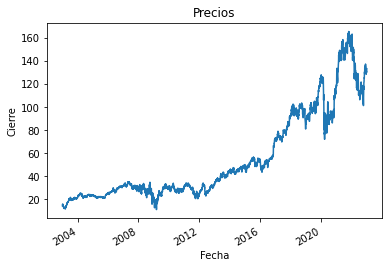

In [ ]:
#Realizar el plot del precio
# PREGUNTA: ¿Por qué utilizar la columna adjusted y no close?
data['Adj Close'].plot()
plt.xlabel("Fecha")
plt.ylabel("Cierre")
plt.title("Precios")
plt.show()

## Estimar retornos efectivos y logaritmicos

In [ ]:
# Encontrar retornos diarios y mensuales tanto efectivos como logaritmicos
daily_returns = data['Adj Close'].pct_change()
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change()

#Retornos logaritmicos
daily_returns_ln = np.log(data['Adj Close'])-np.log(data['Adj Close'].shift(1)) #Recordemos que LN(A/B)=Ln(A)-Ln(B)
monthly_prices=data["Close"].asfreq('BM') #Obtenemos los dato del ultimo dia de cada mes
monthly_returns_ln = np.log(monthly_prices)-np.log(monthly_prices.shift(1))

In [ ]:
print(monthly_returns.tail())
print(monthly_returns_ln.tail())

Date
2022-08-31   -0.014130
2022-09-30   -0.081157
2022-10-31    0.215371
2022-11-30    0.097712
2022-12-31   -0.029527
Freq: M, Name: Adj Close, dtype: float64
Date
2022-08-31   -0.014230
2022-09-30   -0.084640
2022-10-31    0.186142
2022-11-30    0.093228
2022-12-30   -0.029971
Freq: BM, Name: Close, dtype: float64


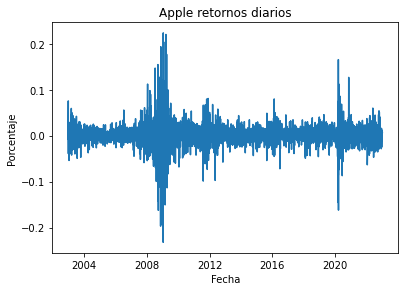

In [ ]:
#Graficar retornos diarios
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(daily_returns_ln) #Usamos los retornos logaritmicos
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Porcentaje")
ax1.set_title("Apple retornos diarios")
plt.show()

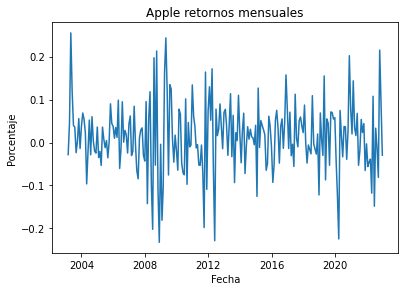

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(monthly_returns)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Porcentaje")
ax1.set_title("Apple retornos mensuales")
plt.show()

## Distribución de rentabilidades historicas

In [ ]:
(daily_returns_ln*100).describe()

count    5034.000000
mean        0.044031
std         2.284646
min       -23.227788
25%        -0.824465
50%         0.026874
75%         0.929078
max        22.391715
Name: Adj Close, dtype: float64

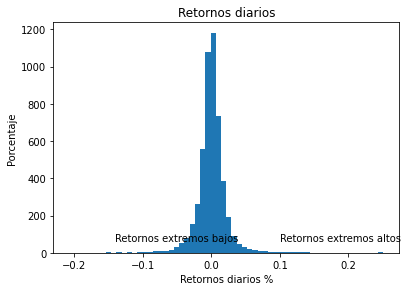

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
daily_returns.plot.hist(bins = 60)
ax1.set_xlabel("Retornos diarios %")
ax1.set_ylabel("Porcentaje")
ax1.set_title("Retornos diarios")
ax1.text(-0.14,60,"Retornos extremos bajos")
ax1.text(0.10,60,"Retornos extremos altos")
plt.show()


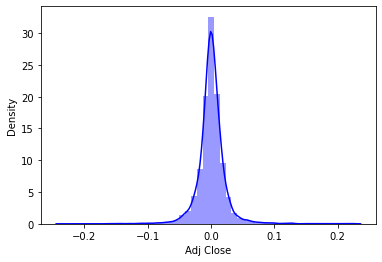

In [ ]:
sns.distplot(daily_returns_ln,bins=50,color="blue")

### ¿Se ajusta la distribución de rendimientos a una distribución gausseana (normal)?

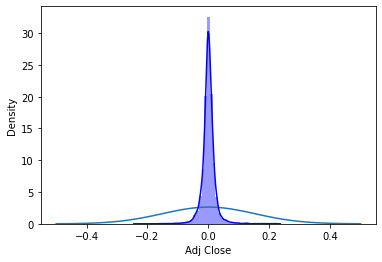

In [ ]:
# Graficar una distribución normal con los parametros encontrados en la nuestros datos
import math
mu =daily_returns.mean()
variance = daily_returns.std()
sigma = math.sqrt(variance)
x = np.linspace(-0.5,0.5)
set_title="Retornos diarios"
plt.plot(x, stats.norm.pdf(x, mu, sigma))

sns.distplot(daily_returns_ln, kde=True,color="blue")

plt.show()


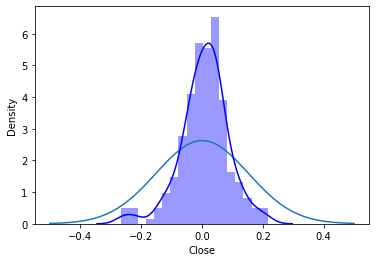

In [ ]:
import math
mu =daily_returns.mean()
variance = daily_returns.std()
sigma = math.sqrt(variance)
x = np.linspace(-0.5,0.5)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

sns.distplot(monthly_returns_ln, kde=True,color="blue")

plt.show()

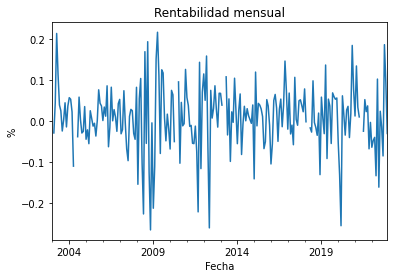

In [ ]:
monthly_returns_ln.plot()
plt.xlabel("Fecha")
plt.ylabel("%")
plt.title("Rentabilidad mensual")
plt.show()

In [ ]:
monthly_returns_ln.describe()

count    229.000000
mean       0.008366
std        0.079346
min       -0.264597
25%       -0.030704
50%        0.012080
75%        0.053323
max        0.216349
Name: Close, dtype: float64

In [ ]:
len(monthly_returns_ln)

240

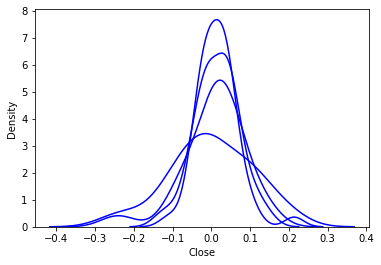

In [ ]:
t=5
for i in range(1,t):
  z=round(len(monthly_returns_ln)/t)
  sns.distplot(monthly_returns_ln[(z*i-z+1):(z*i)], kde=True,color="blue", hist=False)

In [ ]:
for i in range(1,t):
  z=round(len(daily_returns_ln)/t)
  print(z*i-z+1,z*i)

1 1007
1008 2014
2015 3021
3022 4028


## Medidas de riesgo

In [ ]:
monthly_returns_ln=monthly_returns_ln.dropna()

In [ ]:
from scipy.stats import norm
from tabulate import tabulate

alpha=0.05
mean = np.mean(monthly_returns_ln)
std_dev = np.std(monthly_returns_ln)

VaR_90_t = norm.ppf(1-0.9, mean, std_dev)
VaR_95_t = norm.ppf(1-0.95, mean, std_dev)
VaR_99_t = norm.ppf(1-0.99, mean, std_dev)

VaR_90_emp = np.percentile(monthly_returns_ln,10)
VaR_95_emp = np.percentile(monthly_returns_ln,5)
VaR_99_emp = np.percentile(monthly_returns_ln,1)

print (tabulate([['90%', VaR_90_t,VaR_90_emp], ['95%', VaR_95_t,VaR_95_emp], ['99%', VaR_99_t,VaR_99_emp]], headers = ['Nivel de confianza', 'Value at Risk (Teorico)','Value at Risk (Empirico)']))

Nivel de confianza      Value at Risk (Teorico)    Value at Risk (Empirico)
--------------------  -------------------------  --------------------------
90%                                  -0.0930981                  -0.0818192
95%                                  -0.121862                   -0.127732
99%                                  -0.175817                   -0.246378


## Rendimientos pasados son indicadores de rendimientos futuros?

[Text(0, 0.5, 'Retornos T+1'), Text(0.5, 0, 'Retornos T')]

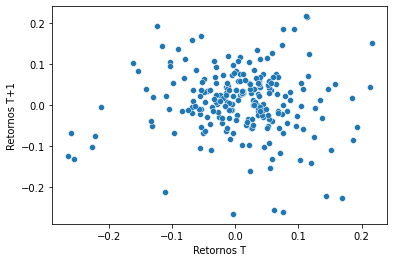

In [ ]:
sns.scatterplot(x=monthly_returns_ln, y=monthly_returns_ln.shift(1)).set(xlabel="Retornos T", ylabel="Retornos T+1")

In [ ]:
base=pd.concat([monthly_returns_ln, monthly_returns_ln.shift(1)],axis=1)
base.corr()

,Close,Close
Close,1.000000,-0.007607
Close,-0.007607,1.000000


## ¿Volatilidad pasados son indicadores de volatilidad futuros?

In [ ]:
Ventana=20
volatilidad_ventanaMensual=daily_returns_ln.rolling(window_size).std()*(252**0.5)
volatilidad_ventanaMensual=volatilidad_ventanaMensual.dropna()

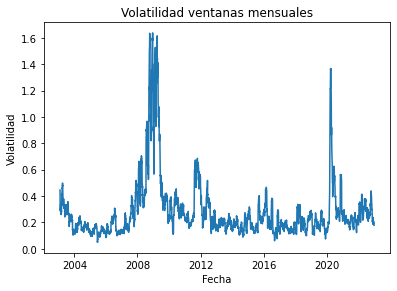

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(volatilidad_ventanaMensual)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Volatilidad")
ax1.set_title("Volatilidad ventanas mensuales")
plt.show()

[Text(0, 0.5, 'Retornos T+1'), Text(0.5, 0, 'Retornos T')]

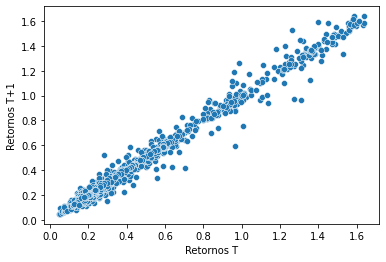

In [ ]:
sns.scatterplot(x=volatilidad_ventanaMensual, y=volatilidad_ventanaMensual.shift(1)).set(xlabel="Retornos T", ylabel="Retornos T+1")

In [ ]:
t=20
volatilidad_ventanaMensual=np.zeros(t)
for i in range(1,t):
  z=round(len(daily_returns_ln)/t)
  volatilidad_ventanaMensual[i]=(monthly_returns_ln[(i*z-z+1):(i*z)].std()*(252**0.5))


TypeError: ignored